# GRIP : THE SPARKS FOUNDATION

## Data Science and Business Analytics intern

## Author : Salma Gaamoussi

## Task 03 : Perforiming EDA on that 'SampleSuperstore' dataset

The purpose of this task, is to find out the weak areas to work on and derive some problems of this business.

###  <u>Import the libraries&dataset reading</u>

In [39]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('SampleSuperstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
 df.shape

(9994, 13)

In [14]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###  <u>Data preparation</u>

In [13]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
#duplicated values
df.duplicated().sum()

17

In [16]:
#dropping the duplicated rows
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
#remove unnecessary columns
df = df.drop(['Postal Code'], axis=1)

###  <u>Exploratory Data Analysis</u>

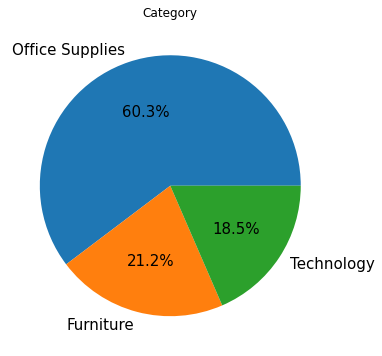

In [30]:
#the percentage of every category in the dataset
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%',textprops=textprops)
plt.show()

<Figure size 720x1152 with 0 Axes>

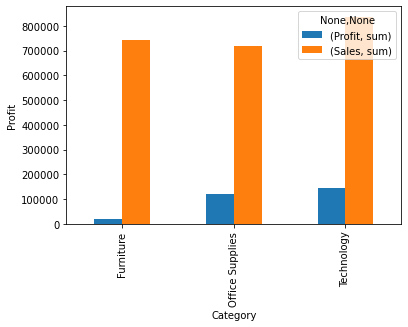

In [31]:
#The profit and the sales for every category
plt.figure(figsize=(10,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

##### From the past two plots, we can see that the category of technology is the one that has a small number of sales but it comapring it with the other other categories it has the biggest profit, it's the most profitable category for the company.

.

.

.

.


In [80]:
#Most weakest Products (by profit)
dfweak10_items =  df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = True)
dfweak10_items.reset_index(drop = True, inplace = True)
dfweak10_items = dfweak10_items.head(10)
dfweak10_items

,Sub-Category,Profit
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995
3,Fasteners,949.5182
4,Machines,3384.7569
5,Labels,5546.2540
6,Art,6527.7870
7,Envelopes,6964.1767
8,Furnishings,13059.1436
9,Appliances,18138.0054


<AxesSubplot:ylabel='Sub-Category'>

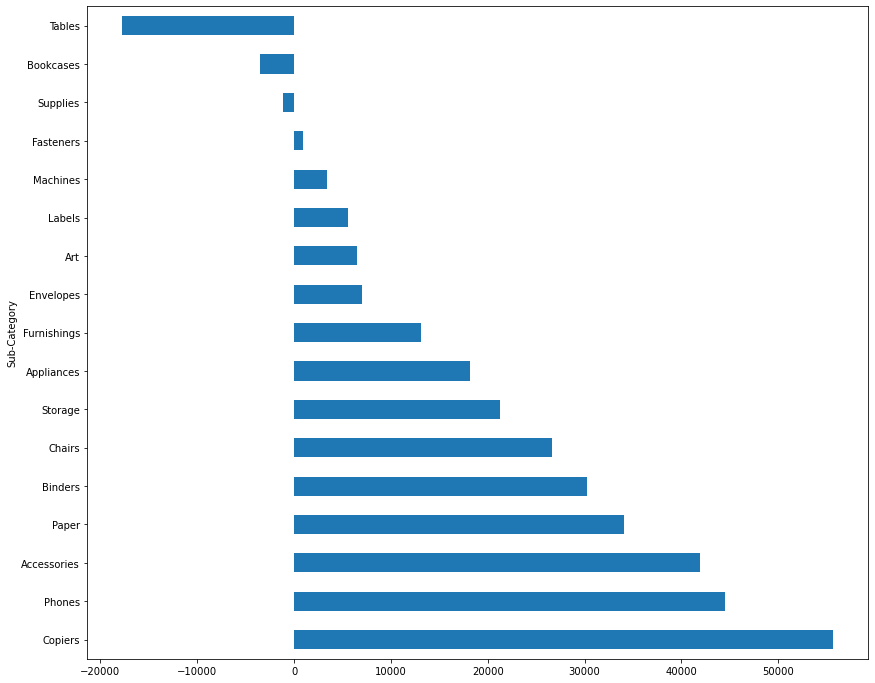

In [37]:
#Representation of the sub-categories with their profits
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

#####  From this bar plot we can see the non-profitable products/sub-categories.

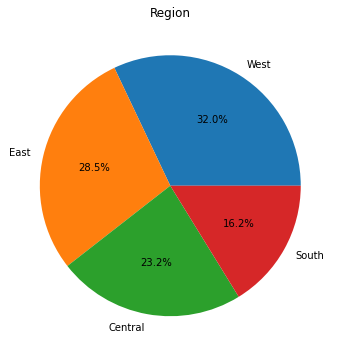

In [38]:
#The Regions that has weak sales
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().index, autopct='%1.1f%%')
plt.show()

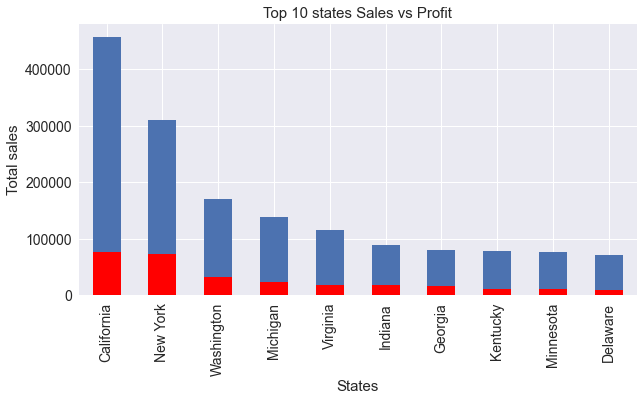

In [40]:
#top states in terms of sales from first observations
top_states_s = df.groupby("State").Sales.sum().nlargest(n=10)

#top states in terms of profit from first observations
top_states_p = df.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar', figsize=(10,5),fontsize=14)
top_states_p.plot(kind = 'bar', figsize=(10,5),fontsize=14, color = 'red')
plt.xlabel('States',fontsize=15)
plt.ylabel('Total sales', fontsize = 15)
plt.title("Top 10 states Sales vs Profit", fontsize = 15)
plt.show()

##### From that plot, California and NYC are the most profitable areas compared to the other cities.


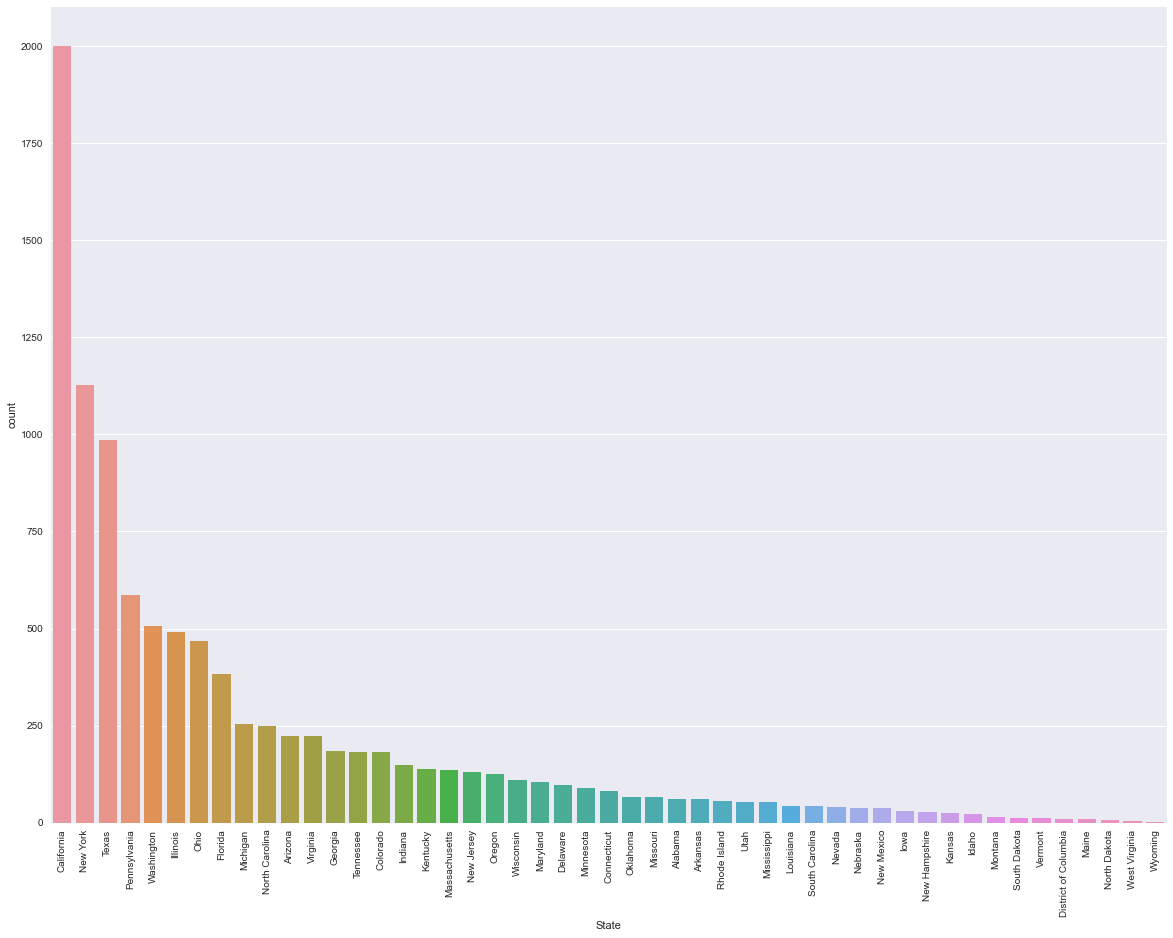

In [44]:
plt.figure(figsize=(20,15))
sns.countplot(x='State',data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

##### California is the top city in terms of sales.




.










.





.







.

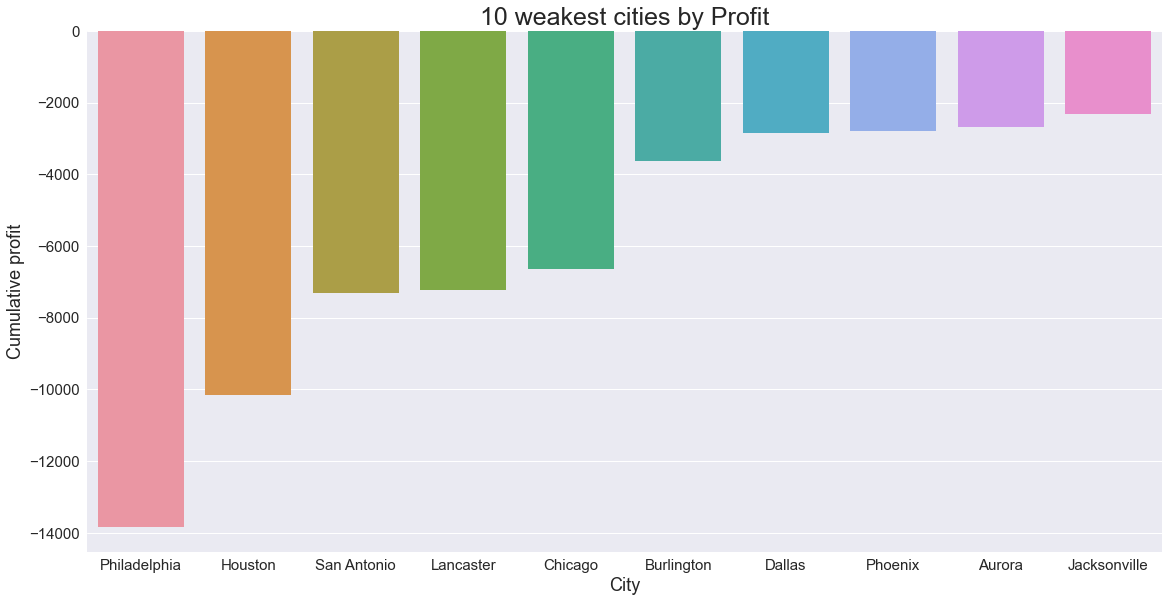

In [81]:
# WEAKEST cities in Profit
dfweak10_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = True)
dfweak10_cities = dfweak10_cities.head(10)
sns.catplot('City','Profit',data = dfweak10_cities, kind = 'bar', aspect = 2, height = 8)
plt.title('10 weakest cities by Profit',size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Cumulative profit', size = 18)
plt.xlabel('City', size = 18)
plt.show()

##### The most weak cities that gives low profit : Philadelphia, Houston, San Antonio, Lancaster, Chicago, Burlington, Dallas, Phoenix, Aurora, Jacksonville

.

.

.

.

.


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

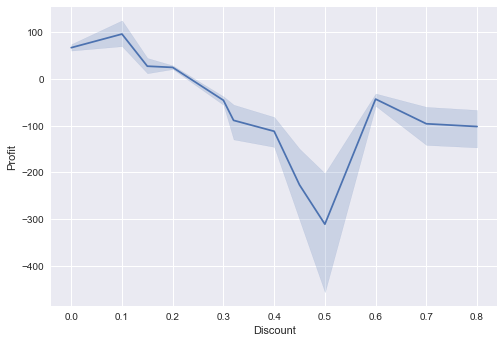

In [50]:
 #Profit vs Discount
sns.lineplot(y = 'Profit',x = 'Discount', data = df)

##### The Discount is profitable when it's <= 20% , but when it goes past this percentge, the company will face a loss.\


.


.

.


.

<AxesSubplot:xlabel='Region'>

<Figure size 1080x720 with 0 Axes>

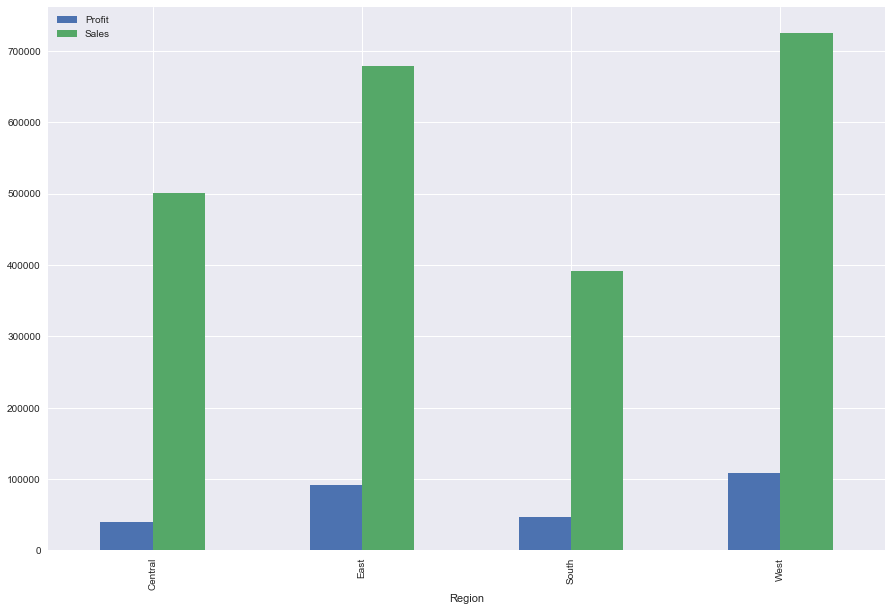

In [51]:
#sales in each region
plt.figure(figsize=(15,10))
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(figsize=(15,10))


#### Even though the sales in the central region is high , but profit made is low, we should find more ways to increase the profit in the central region.

###  <u>COnclusions</u>
-Technology has the highest sales among other categories.

-The State with the highest amount of sales is California followed by NYC, Texas, and so on.

-Copier has maximum amount of profit and chair has the maximum amount of sales amongst all the given sub_categories.

-Highest sales and profits are recorded in the Technology category.

-Even though the sales in the central region is high , but profit made is low and hence, we should find more ways to increase the profit in the central region.

-Loss is noticed in Tables,Bookcases, supplies, Fasteners... and other fourniture Category, relevant actions and strategies should be made to minimize the losses.
